<a href="https://colab.research.google.com/github/Goodnowcurr30/ML-and-DL-projects/blob/master/HeartFailurePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Scenario:
You have just been hired as a Data Scientist at a Hospital with an alarming number of patients coming in reporting various cardiac symptoms. A cardiologist measures vitals & hands you this data to perform Data Analysis and predict whether certain patients have Heart Disease. We would like to make a Machine Learning algorithm where we can train our AI to learn & improve from experience. Thus, we would want to classify patients as either positive or negative for Heart Disease.


Goal:
Predict whether a patient should be diagnosed with Heart Disease. This is a binary outcome.
Positive (+) = 1, patient diagnosed with Heart Disease
Negative (-) = 0, patient not diagnosed with Heart Disease
Experiment with various Classification Models & see which yields greatest accuracy.
Examine trends & correlations within our data
Determine which features are most important to Positive/Negative Heart Disease diagnosis



# **Importing necessary liberies**

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     - 25.9 MB 144 kB/s
     |████████████████████████████████| 10.9 MB 7.7 MB/s 
     |████████████████████████████████| 596 kB 35.5 MB/s 
     |████████████████████████████████| 102 kB 8.6 MB/s 
     |████████████████████████████████| 675 kB 35.0 MB/s 
     |████████████████████████████████| 4.7 MB 45.1 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 812 kB 39.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.6 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=1cfdf17484d85e7eaf6f9917aba2933aaa7cffeb9eda19d279ecafcaecb00f30
  Stored in directory: /tmp/pip-ephem-wheel-cache-vsqqevf2/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=83b9dcffc475e78a92bfb398d9628066d9a4ceaee0b08999ea01819e3b95513a
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

In [ ]:
# Reading the Dataset
df = pd.read_csv("/content/drive/MyDrive/dataset/heart.csv")

df.head()

Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0   40   M           ATA  ...      0.0        Up             0
1   49   F           NAP  ...      1.0      Flat             1
2   37   M           ATA  ...      0.0        Up             0
3   48   F           ASY  ...      1.5      Flat             1
4   54   M           NAP  ...      0.0        Up             0

[5 rows x 12 columns]

In [ ]:
df.tail()

Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
913   45   M            TA  ...      1.2      Flat             1
914   68   M           ASY  ...      3.4      Flat             1
915   57   M           ASY  ...      1.2      Flat             1
916   57   F           ATA  ...      0.0      Flat             1
917   38   M           NAP  ...      0.0        Up             0

[5 rows x 12 columns]

In [ ]:
df.describe()

Age   RestingBP  ...     Oldpeak  HeartDisease
count  918.000000  918.000000  ...  918.000000    918.000000
mean    53.510893  132.396514  ...    0.887364      0.553377
std      9.432617   18.514154  ...    1.066570      0.497414
min     28.000000    0.000000  ...   -2.600000      0.000000
25%     47.000000  120.000000  ...    0.000000      0.000000
50%     54.000000  130.000000  ...    0.600000      1.000000
75%     60.000000  140.000000  ...    1.500000      1.000000
max     77.000000  200.000000  ...    6.200000      1.000000

[8 rows x 7 columns]

In [ ]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Sex']=le.fit_transform(df['Sex'])
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])

df.head(9)

Age  Sex  ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0   40    1              1  ...      0.0         2             0
1   49    0              2  ...      1.0         1             1
2   37    1              1  ...      0.0         2             0
3   48    0              0  ...      1.5         1             1
4   54    1              2  ...      0.0         2             0
5   39    1              2  ...      0.0         2             0
6   45    0              1  ...      0.0         2             0
7   54    1              1  ...      0.0         2             0
8   37    1              0  ...      1.5         1             1

[9 rows x 12 columns]

We check if their is a good proportion between our positive and negative binary predictor.

In [ ]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

## Exploratory Data Analysis

### Correlation Matrix
Correlation Matrix lets you see correlations between all variable. How highly or weak each variable is related to each other.

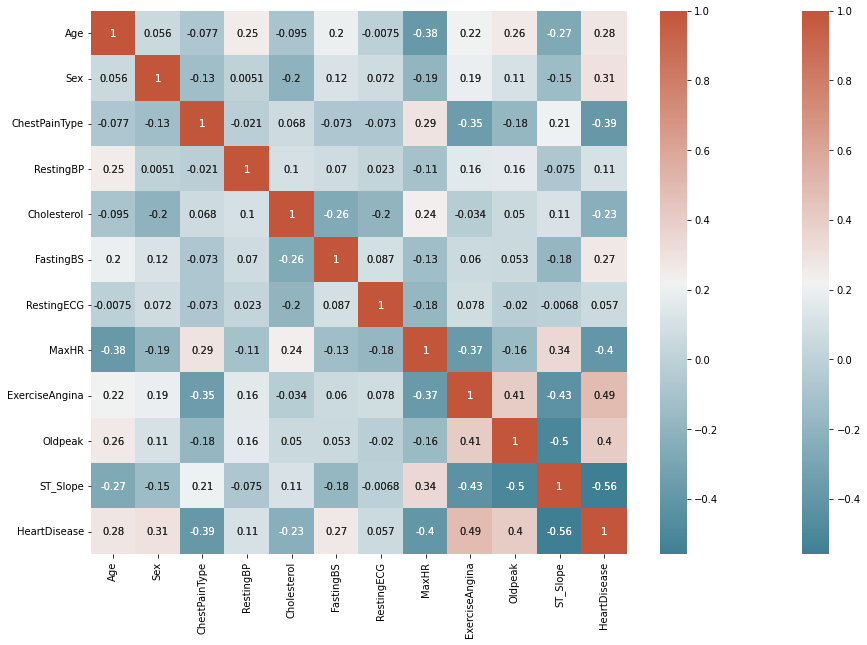

In [ ]:
# calculate correlation matrix

corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), 
            xticklabels=corr.columns, yticklabels=corr.columns)
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), 
            xticklabels=corr.columns, yticklabels=corr.columns)

We can see there is a positive correlation between ST depression and predictor (Heart Disease).

In addition, we see a negative correlation between maximum heart rate and our predictor (Heart Disease)


Pairplots are also a great way to immediately see the correlations between all variables. But I will use only continous columns from our data, because with so many features, it can be difficult to see each one

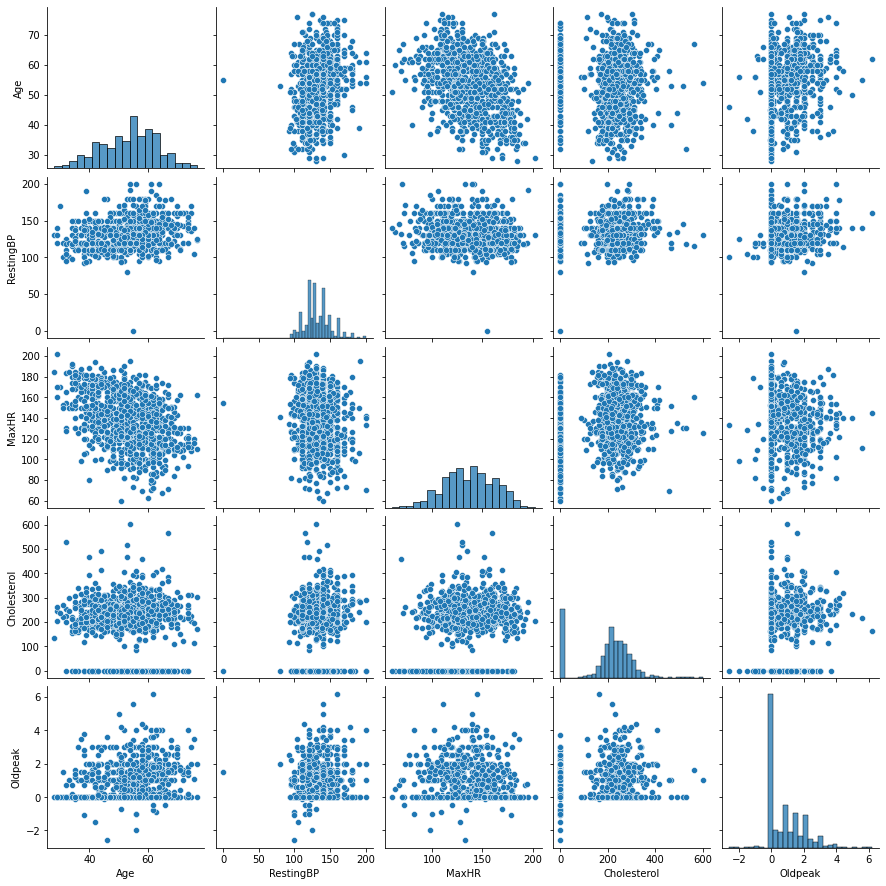

In [ ]:
subData = df[['Age', 'RestingBP', 'MaxHR', 'Cholesterol', 'Oldpeak']]
sns.pairplot(subData)

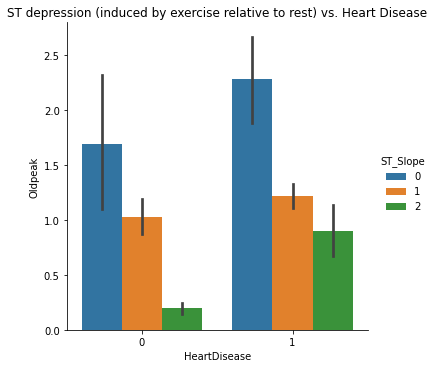

In [ ]:
# checking for the relationship between ST Depression vs Heart Disease

sns.catplot(x="HeartDisease", y="Oldpeak", hue="ST_Slope", kind="bar", 
            data=df).set(title="ST depression (induced by exercise relative to rest) vs. Heart Disease")

ST segment depression occurs because when the ventricle is at rest and therefore repolarized. If the trace in the ST segment is abnormally low below the baseline, this can lead to this Heart Disease. This is supports the plot above because low ST Depression yields people at greater risk for heart disease. While a high ST depression is considered normal & healthy. The “slope” hue, refers to the peak exercise ST segment, with values: 0: upsloping , 1: flat , 2: downsloping). Both positive & negative heart disease patients exhibit equal distributions of the 3 slope categories.

[Text(0.5, 1.0, 'ST depression level vs. Heart Disease')]

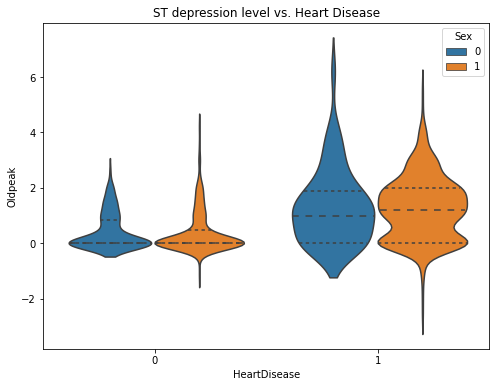

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="HeartDisease", y="Oldpeak", hue="Sex", inner='quartile', 
               data=df).set(title="ST depression level vs. Heart Disease")

We can see that the overall shape & distribution for negative & positive patients differ vastly. Negative patients exhibit a lower median for ST depression level & thus a great distribution of their data is between 0 & 2, while positive patients are between 1 & 3. In addition, we don’t see many differences between male & female target outcomes.

### Filtering data by Positive & Negative Heart Disease Patient

In [ ]:
#Filtering data by Positive Heart Disease patient
pos_data = df[df["HeartDisease"] == 1]
pos_data.describe()

Age         Sex  ...    ST_Slope  HeartDisease
count  508.000000  508.000000  ...  508.000000         508.0
mean    55.899606    0.901575  ...    1.057087           1.0
std      8.727056    0.298182  ...    0.497220           0.0
min     31.000000    0.000000  ...    0.000000           1.0
25%     51.000000    1.000000  ...    1.000000           1.0
50%     57.000000    1.000000  ...    1.000000           1.0
75%     62.000000    1.000000  ...    1.000000           1.0
max     77.000000    1.000000  ...    2.000000           1.0

[8 rows x 12 columns]

In [ ]:
neg_data = df[df["HeartDisease"] == 0]
neg_data.describe()

Age         Sex  ...    ST_Slope  HeartDisease
count  410.000000  410.000000  ...  410.000000         410.0
mean    50.551220    0.651220  ...    1.739024           0.0
std      9.444915    0.477167  ...    0.511663           0.0
min     28.000000    0.000000  ...    0.000000           0.0
25%     43.000000    0.000000  ...    2.000000           0.0
50%     51.000000    1.000000  ...    2.000000           0.0
75%     57.000000    1.000000  ...    2.000000           0.0
max     76.000000    1.000000  ...    2.000000           0.0

[8 rows x 12 columns]

In [ ]:
print("Positive Patients ST depression average: " + str(pos_data['Oldpeak'].mean()))
print("Negative Patients ST depression average: " + str(neg_data['Oldpeak'].mean()))
print("\n")
print("Positive Patients Max Heart Rate average: " + str(pos_data['MaxHR'].mean()))
print("Negative Patients Max Heart Rate average: " + str(neg_data['MaxHR'].mean()))

Positive Patients ST depression average: 1.274212598425197
Negative Patients ST depression average: 0.40804878048780474


Positive Patients Max Heart Rate average: 127.65551181102362
Negative Patients Max Heart Rate average: 148.15121951219513


By comparing positve and negative patients, we can see there are vast differences in means for many of our 13 features.

## Prepare Data for Modeling
To prepare data for modeling, remember ASN (Assign, Split, Normalize)

In [ ]:
# Assign the 13 features to X, and the last column to our classification predictor y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# Split the data set into the training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
# Normalize: Standardizing the data will transform the data so that its 
# distribution will have a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Modeling / Training
Using various Supervised Learning Classification Models on the Training set and see which yields the highest accuracy.
Logistic Regression, K-NN (k-Nearest Neighbours), SVM (Support Vector Machine), Naives Bayes Classifier, Decision Trees, Random Forest, and XGBoost.

In [ ]:
# LOGISTIC REGRESSION
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
model1 = LogisticRegression(random_state=1)

model1.fit(x_train, y_train) #fit data into model and train

pred_model1 = model1.predict(x_test) #get prediction
print(classification_report(y_test, pred_model1)) #out accuracy report

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        74
           1       0.92      0.92      0.92       110

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [ ]:
# SVM (Support Vector Machine)
from sklearn.metrics import classification_report
from sklearn.svm import SVC

model2 = SVC(random_state = 1) #initialize svc

model2.fit(x_train, y_train) #fit data into model and train

pred_model2 = model2.predict(x_test) #Prediction
print(classification_report(y_test, pred_model2)) #output accuracy report

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        74
           1       0.92      0.93      0.92       110

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



In [ ]:
# KNN (K-Nearest Neighbors)
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier()

model3.fit(x_train, y_train)
pred_model3 = model3.predict(x_test)
print(classification_report(y_test, pred_model3))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86        74
           1       0.91      0.90      0.90       110

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [ ]:
# Naives Bayes Classifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() #initialize
model4.fit(x_train, y_train) #fitting and training model

pred_model4 = model4.predict(x_test) #predict
print(classification_report(y_test, pred_model4)) #output accuracy report

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        74
           1       0.92      0.90      0.91       110

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [ ]:
# Random Forest
from sklearn.metrics import classification_report
from sklearn.ensemble import  RandomForestClassifier

model5 = RandomForestClassifier(random_state=1)
model5.fit(x_train, y_train)

pred_model5 = model5.predict(x_test)
print(classification_report(y_test, pred_model5))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85        74
           1       0.90      0.89      0.89       110

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [ ]:
# XGBoost
from xgboost import XGBClassifier

model6 = XGBClassifier(random_state=1)
model6.fit(x_train, y_train)

pred_model6 = model6.predict(x_test)
print(classification_report(y_test, pred_model6))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87        74
           1       0.92      0.91      0.91       110

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, pred_model2)
print(cm)
accuracy_score(y_test, pred_model2)

[[ 65   9]
 [  8 102]]


0.907608695652174

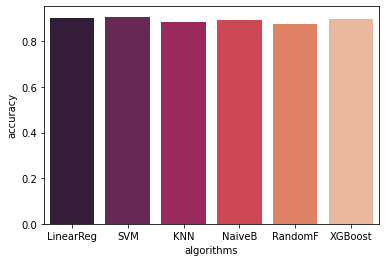

In [ ]:
accuracy = pd.DataFrame({
    "algorithms" : ['LinearReg', 'SVM', 'KNN', 'NaiveB', 'RandomF', 'XGBoost'],
    "accuracy" : [accuracy_score(y_test, pred_model1), accuracy_score(y_test, pred_model2), 
                  accuracy_score(y_test, pred_model3), accuracy_score(y_test, pred_model4), 
                  accuracy_score(y_test, pred_model5), accuracy_score(y_test, pred_model6)]
})
sns.barplot(x='algorithms', y='accuracy', data=accuracy, palette='rocket')